In [1]:
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(r'/home/hcst/HCST_lib/ORCA/dcamsdk4/samples/python')

from dcamcon import *

In [2]:
    # # initialize DCAM-API
    # if dcamcon_init():
    #     # choose camera and get Dcamcon instance
    #     dcamcon = Dcam(0)
    #     dcamcon.dev_open()
    #     if dcamcon is not None:
    #         res = True
    #         # set basic properties
    #         if (not signaled_sigint and
    #             res):
    #             res = setup_properties(dcamcon)
            
    #         # show live image
    #         if (not signaled_sigint and
    #             res):
    #             show_live_captured_images(dcamcon)
            
    #         # close dcam
    #         dcamcon.close()
    
    # # cleanup dcamcon
    # dcamcon_uninit()

In [3]:
def setup_properties(dcamcon: Dcamcon):
    """Set properties ralated framebundle.

    Set to subarray size to minimum and set farmebundle number to maximum.

    Args:
        dcamcon (Dcamcon): Dcamcon instance
    
    Returns:
        bool: result
    """
    # setup minimum subarray to enable framebundle
    propattr_hsize = dcamcon.dcam.prop_getattr(DCAM_IDPROP.SUBARRAYHSIZE)
    propattr_vsize = dcamcon.dcam.prop_getattr(DCAM_IDPROP.SUBARRAYVSIZE)

    hsize = propattr_hsize.valuemin # cant be bigger than 4?
    vsize = propattr_vsize.valuemin

    if(dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYMODE, DCAMPROP.MODE.OFF) is False or
       dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYHSIZE, hsize) is False or
       dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYVSIZE, vsize) is False or
       dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYMODE, DCAMPROP.MODE.ON) is False):
        return False

    if(dcamcon.prompt_propvalue(DCAM_IDPROP.EXPOSURETIME) is False):
        return False
    
    # set maximum framebundle
    propattr_bundlenum = dcamcon.dcam.prop_getattr(DCAM_IDPROP.FRAMEBUNDLE_NUMBER)
    bundlenum = propattr_bundlenum.valuemax

    val = dcamcon.setget_propertyvalue(DCAM_IDPROP.FRAMEBUNDLE_NUMBER, bundlenum)
    if val is False:
        print('Framebundle not capable with this device.')
        return False

    val = dcamcon.setget_propertyvalue(DCAM_IDPROP.FRAMEBUNDLE_MODE, DCAMPROP.MODE.ON)
    if val is False:
        return False
        
    return True

In [4]:
print(dcamcon_init())
# choose camera and get Dcamcon instance
# dcamcon = Dcam(0)
# dcamcon.dev_open()
# res = setup_properties(dcamcon)

Calling Dcamapi.init()
True


In [5]:
# dcamcon.dcam = Dcam(0)
# print(dcamcon.dev_open())

In [13]:
# print(dcamcon.close())

# print(dcamcon_uninit())
Dcamapi.uninit()

True

In [5]:
dcamcon = dcamcon_choose_and_open()
print(dcamcon)

res = setup_properties(dcamcon)
print(res)

#[0]: MODEL=C15550-20UP, CAMERAID=S/N: 000566, BUS=USB3




Enter a value for EXPOSURE TIME between 0.000007s and 1800.0s in steps of 0.0s [default is 0.008294s]

>  0.01


True


In [6]:
# res = setup_properties(dcamcon)

# dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYHSIZE, 6) 
dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYMODE, DCAMPROP.MODE.OFF)

True

In [10]:
dcamcon.get_propertyvalue(DCAM_IDPROP.TRIGGER_MODE)

1.0

In [7]:
dcamcon.set_propertyvalue(DCAM_IDPROP.EXPOSURETIME, 0.01) 

print(dcamcon.get_propertyvalue(DCAM_IDPROP.EXPOSURETIME)) 

0.010000799999999999


In [29]:
print(dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYHSIZE, 100))
print(dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYVSIZE, 100))
dcamcon.set_propertyvalue(DCAM_IDPROP.SUBARRAYMODE, DCAMPROP.MODE.ON)

True
True


True

In [8]:
def dcamtest_show_framedata(data):
    """Show image data.

    Show numpy buffer as an image with OpenCV function.

    Args:
        data (void): NumPy array.

    Returns:
        Nothing.
    """
    if data.dtype == np.uint16:
        imax = np.amax(data)
        if imax > 0:
            imul = int(65535 / imax)
            # print('Multiple %s' % imul)
            data = data * imul

        plt.imshow(data)
    else:
        print('-NG: dcamtest_show_image(data) only support Numpy.uint16 data')




if dcamcon.allocbuffer(1):
    if dcamcon.dcam.cap_snapshot():
        timeout_milisec = int(2 * dcamcon.get_propertyvalue(DCAM_IDPROP.EXPOSURETIME) * 1000)
        while True:
            if dcamcon.wait_capevent_frameready(timeout_milisec):
                data = dcamcon.dcam.buf_getlastframedata()
                if data != False:
                    dcamtest_show_framedata(data)
                break

            dcamerr = dcamcon.dcam.lasterr()
            if dcamerr.is_timeout():
                print('===: timeout')
                continue

            print('-NG: Dcam.wait_event() fails with error {}'.format(dcamerr))
            break
    else:
        print('-NG: Dcam.cap_start() fails with error {}'.format(dcam.lasterr()))

    dcamcon.releasebuffer()
else:
    print('-NG: Dcam.buf_alloc(1) fails with error {}'.format(dcam.lasterr()))


-NG: Dcam.buf_release() failed with error BUSY


In [9]:
dcamcon.releasebuffer()

True

In [10]:
dcamcon.dcam.buf_release()


True

In [7]:
def sigint_handler(signum, frame):
    """Detect pressing Ctrl+C.
    
    Signal handler function.
    This script is handling SIGINT only.
    signaled_sigint is set True.
    """
    global signaled_sigint
    signaled_sigint = True
def show_framedata(title, data):
    plt.figure()
    plt.imshow(data)
    plt.title(title)
    # plt.drawnow()

In [8]:
# get property value used
exposuretime = dcamcon.get_propertyvalue(DCAM_IDPROP.EXPOSURETIME)
if exposuretime is False:
    # should be able to get the value
    print('exit')

triggersource = dcamcon.get_propertyvalue(DCAM_IDPROP.TRIGGERSOURCE)
if triggersource is False:
    # should be able to get the value
    print('exit')

trigger_mode = dcamcon.get_propertyvalue(DCAM_IDPROP.TRIGGER_MODE)
if trigger_mode is False:
    # shoulf be able to get the value
    print('exit')


number_of_frames = 5
# prepare buffer
if not dcamcon.allocbuffer(number_of_frames):
    print('exit')


In [9]:
# calculate timeout time
timeout_millisec = 2

framebundlenum = 1
if dcamcon.get_propertyvalue(DCAM_IDPROP.FRAMEBUNDLE_MODE) == DCAMPROP.MODE.ON:
    framebundlenum = dcamcon.get_propertyvalue(DCAM_IDPROP.FRAMEBUNDLE_NUMBER)

frameinterval = dcamcon.get_propertyvalue(DCAM_IDPROP.INTERNAL_FRAMEINTERVAL, False)
if frameinterval is not False:
    # set timeout waiting for a frame to arrive to exposure time + internal frame interval + 500 ms
    timeout_millisec = int((exposuretime + frameinterval) * int(framebundlenum) * 1000.0) + 500
else:
    # set timeout waiting for a frame to arrive to exposure time + 1 second
    timeout_millisec = int(exposuretime * int(framebundlenum) * 1000.0) + 1000

# let's use 2ms minimum timeout
if timeout_millisec < 2:
    timeout_millisec = 2

# start live
if not dcamcon.startcapture():
    # dcamcon.allocbuffer() should have succeeded
    dcamcon.releasebuffer()
    print('exit')

save_at_finish_live =False

In [10]:
triggersource = dcamcon.get_propertyvalue(DCAM_IDPROP.TRIGGERSOURCE)

firetrigger_cycle = 0
framecount_till_firetrigger = 0
if triggersource == DCAMPROP.TRIGGERSOURCE.SOFTWARE:
    if trigger_mode == DCAMPROP.TRIGGER_MODE.START:
        # Software Start requires only one firetrigger at beginning
        firetrigger_cycle = 0
    elif trigger_mode == DCAMPROP.TRIGGER_MODE.PIV:
        # PIV require firetrigger for 2 frames
        firetrigger_cycle = 2
    else:
        # standard software trigger requires one firetrigger for one frame
        firetrigger_cycle = 1
    
    # we'll fire a trigger to initiate capturing for this sample
    dcamcon.firetrigger()
    framecount_till_firetrigger = firetrigger_cycle

timeout_happened = 0


res = dcamcon.wait_capevent_frameready(timeout_millisec)
print(res)

True


In [12]:
lastdata = dcamcon.get_lastframedata()
lastdata.shape

(2304, 4096)

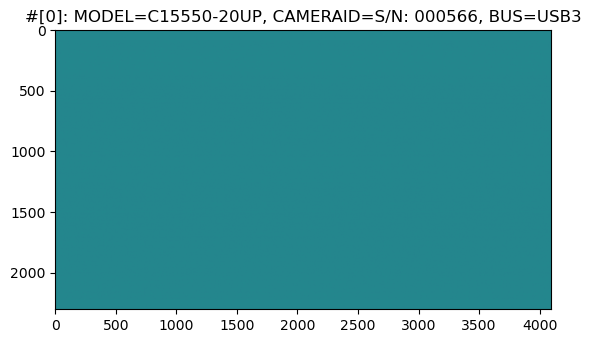

In [13]:
if lastdata is not False:
    show_framedata(dcamcon.device_title, lastdata)

if framecount_till_firetrigger > 0:
    framecount_till_firetrigger -= 1
    if framecount_till_firetrigger == 0:
        dcamcon.firetrigger()
        framecount_till_firetrigger = firetrigger_cycle

timeout_happened = 0

In [14]:
dcamcon.stopcapture()

if save_at_finish_live:
    dcamcon.save_rawimages('LastGoodImage')

dcamcon.releasebuffer()

KeyboardInterrupt: 

In [26]:
# plt.imshow(lastdata[0])
print(lastdata.shape)
print(dcamcon.get_propertyvalue(DCAM_IDPROP.SUBARRAYHSIZE))
print(dcamcon.get_propertyvalue(DCAM_IDPROP.SUBARRAYVSIZE))

propattr_hsize = dcamcon.dcam.prop_getattr(DCAM_IDPROP.SUBARRAYVSIZE)
propattr_hsize.valuemax

(4096, 4)
4.0
4.0


2304.0

In [10]:
# def show_live_captured_images(dcamcon: Dcamcon):
"""Show live images.

It captures images and shows live images.

Args:
    dcamcon (Dcamcon): Dcamcon instance
"""
# # get property value used
# exposuretime = dcamcon.get_propertyvalue(DCAM_IDPROP.EXPOSURETIME)
# if exposuretime is False:
#     # should be able to get the value
#     return

# triggersource = dcamcon.get_propertyvalue(DCAM_IDPROP.TRIGGERSOURCE)
# if triggersource is False:
#     # should be able to get the value
#     return

# trigger_mode = dcamcon.get_propertyvalue(DCAM_IDPROP.TRIGGER_MODE)
# if trigger_mode is False:
#     # shoulf be able to get the value
#     return


# number_of_frames = 5
# # prepare buffer
# if not dcamcon.allocbuffer(number_of_frames):
#     return

# # calculate timeout time
# timeout_millisec = 2

# framebundlenum = 1
# if dcamcon.get_propertyvalue(DCAM_IDPROP.FRAMEBUNDLE_MODE) == DCAMPROP.MODE.ON:
#     framebundlenum = dcamcon.get_propertyvalue(DCAM_IDPROP.FRAMEBUNDLE_NUMBER)

# frameinterval = dcamcon.get_propertyvalue(DCAM_IDPROP.INTERNAL_FRAMEINTERVAL, False)
# if frameinterval is not False:
#     # set timeout waiting for a frame to arrive to exposure time + internal frame interval + 500 ms
#     timeout_millisec = int((exposuretime + frameinterval) * int(framebundlenum) * 1000.0) + 500
# else:
#     # set timeout waiting for a frame to arrive to exposure time + 1 second
#     timeout_millisec = int(exposuretime * int(framebundlenum) * 1000.0) + 1000

# # let's use 2ms minimum timeout
# if timeout_millisec < 2:
#     timeout_millisec = 2

# # start live
# if not dcamcon.startcapture():
#     # dcamcon.allocbuffer() should have succeeded
#     dcamcon.releasebuffer()
#     return

triggersource = dcamcon.get_propertyvalue(DCAM_IDPROP.TRIGGERSOURCE)

firetrigger_cycle = 0
framecount_till_firetrigger = 0
if triggersource == DCAMPROP.TRIGGERSOURCE.SOFTWARE:
    if trigger_mode == DCAMPROP.TRIGGER_MODE.START:
        # Software Start requires only one firetrigger at beginning
        firetrigger_cycle = 0
    elif trigger_mode == DCAMPROP.TRIGGER_MODE.PIV:
        # PIV require firetrigger for 2 frames
        firetrigger_cycle = 2
    else:
        # standard software trigger requires one firetrigger for one frame
        firetrigger_cycle = 1
    
    # we'll fire a trigger to initiate capturing for this sample
    dcamcon.firetrigger()
    framecount_till_firetrigger = firetrigger_cycle

timeout_happened = 0

global cv_window_status
global signaled_sigint
# while cv_window_status >= 0:
# while ~signaled_sigint:
    # break

res = dcamcon.wait_capevent_frameready(timeout_millisec)
if res is not True:
    # frame does not come
    if res != DCAMERR.TIMEOUT:
        print('-NG: Dcam.wait_event() failed with error {}'.format(res))
        # break

    # TIMEOUT error happens
    timeout_happened += 1
    if timeout_happened == 1:
        print('Waiting for a frame to arrive.', end='')
        if triggersource == DCAMPROP.TRIGGERSOURCE.EXTERNAL:
            print(' Check your trigger source.', end='')
        else:
            print(' Check your <timeout_millisec> calculation in the code.', end='')
        print(' Press Ctrl+C to abort.')
    else:
        print('.')
        if timeout_happened > 5:
            timeout_happened = 0
    
    # continue

# wait_capevent_frameready() succeeded
lastdata = dcamcon.get_lastframedata()
if lastdata is not False:
    show_framedata(dcamcon.device_title, lastdata)

if framecount_till_firetrigger > 0:
    framecount_till_firetrigger -= 1
    if framecount_till_firetrigger == 0:
        dcamcon.firetrigger()
        framecount_till_firetrigger = firetrigger_cycle

timeout_happened = 0


dcamcon.stopcapture()

if save_at_finish_live:
    dcamcon.save_rawimages('LastGoodImage')

dcamcon.releasebuffer()



Waiting for a frame to arrive. Check your <timeout_millisec> calculation in the code. Press Ctrl+C to abort.
-NG: Dcam.buf_getlastframedata() failed with error BUSY


True

In [12]:
dcamcon.stopcapture()


dcamcon.releasebuffer()

True

In [25]:
signaled_sigint = True

NameError: name 'signaled_sigint' is not defined

In [4]:
def dcam_show_device_list():
    """Show device list.
    
    Show model names ans IDs of the connected camera.

    Returns:
        Nothing.
    """
    if Dcamapi.init():
        n = Dcamapi.get_devicecount()
        for i in range(0, n):
            dcam = Dcam(i)
            output = '#{}: '.format(i)

            model = dcam.dev_getstring(DCAM_IDSTR.MODEL)
            if model is False:
                output = output + 'No DCAM_IDSTR.MODEL'
            else:
                output = output + 'MODEL={}'.format(model)

            cameraid = dcam.dev_getstring(DCAM_IDSTR.CAMERAID)
            if cameraid is False:
                output = output + ', No DCAM_IDSTR.CAMERAID'
            else:
                output = output + ', CAMERAID={}'.format(cameraid)

            print(output)
    else:
        print('-NG: Dcamapi.init() fails with error {}'.format(Dcamapi.lasterr()))


In [5]:
dcam_show_device_list()


#0: MODEL=C15550-20UP, CAMERAID=S/N: 000566


True

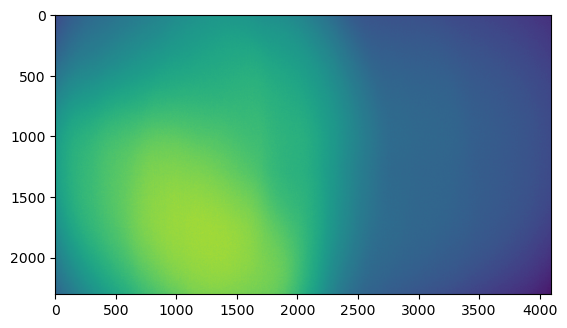

In [15]:
Dcamapi.init()
dcam = Dcam(0)
if dcam.dev_open():
    if dcam.buf_alloc(1):
        if dcam.cap_snapshot():
            timeout_milisec = 1000
            while True:
                if dcam.wait_capevent_frameready(timeout_milisec):
                    data = dcam.buf_getlastframedata()
                    dcamtest_show_framedata(data)
                    break

                dcamerr = dcam.lasterr()
                if dcamerr.is_timeout():
                    print('===: timeout')
                    continue

                print('-NG: Dcam.wait_event() fails with error {}'.format(dcamerr))
                break
        else:
            print('-NG: Dcam.cap_start() fails with error {}'.format(dcam.lasterr()))

        dcam.buf_release()
    else:
        print('-NG: Dcam.buf_alloc(1) fails with error {}'.format(dcam.lasterr()))
    dcam.dev_close()
else:
    print('-NG: Dcam.dev_open() fails with error {}'.format(dcam.lasterr()))


Dcamapi.uninit()